In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
# 簇的方差是0.6

In [4]:
X.shape

(50, 2)

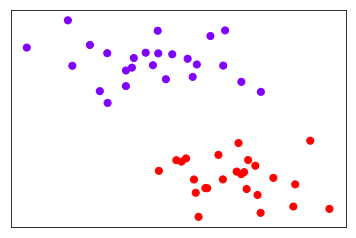

In [9]:
plt.scatter(X[:,0],X[:,1]
            ,c=y
            ,s=50
            ,cmap="rainbow"
           )
plt.xticks([])
plt.yticks([])
plt.show()

函数contour:X,Y--选填，二维平面上所有点的横纵坐标取值。
    Z--必填，平面上所有点对应的高度。
    levels--可不填，默认显示所有等高线，用于确定等高线的位置和数量。

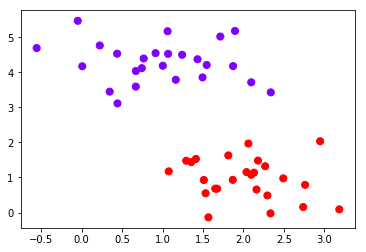

In [6]:
# 首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

In [7]:
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [8]:
xlim

(-0.7541740493109252, 3.3838081780236036)

In [9]:
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [10]:
axisx

array([-0.75417405, -0.61148501, -0.46879596, -0.32610692, -0.18341788,
       -0.04072884,  0.1019602 ,  0.24464925,  0.38733829,  0.53002733,
        0.67271637,  0.81540542,  0.95809446,  1.1007835 ,  1.24347254,
        1.38616159,  1.52885063,  1.67153967,  1.81422871,  1.95691775,
        2.0996068 ,  2.24229584,  2.38498488,  2.52767392,  2.67036297,
        2.81305201,  2.95574105,  3.09843009,  3.24111914,  3.38380818])

In [11]:
axisy,axisx = np.meshgrid(axisy,axisx) 
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y 
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [14]:
axisy.ravel().shape

(900,)

In [13]:
axisx.shape

(30, 30)

In [15]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T 
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

meshgrid作用：广播    
vstack作用： 堆叠   
然后画图scatter

In [16]:
xy.shape

(900, 2)

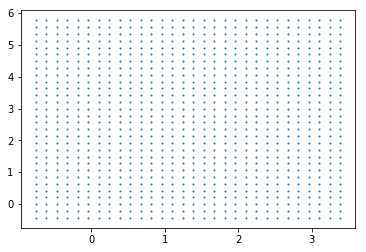

In [17]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow") 

In [18]:
#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])
#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)

v1,v2 = np.meshgrid(a,b)  #广播

In [19]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [21]:
v1.ravel()

array([1, 2, 3, 1, 2, 3])

In [20]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [22]:
v2.ravel()

array([7, 7, 7, 8, 8, 8])

In [23]:
v = np.vstack([v1.ravel(),v2.ravel()]).T

In [24]:
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [26]:
# 建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y) 
Z = clf.decision_function(xy).reshape(axisx.shape) 
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

In [27]:
Z.shape

(30, 30)

In [42]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

SyntaxError: invalid character in identifier (<ipython-input-42-877e3900efa9>, line 6)

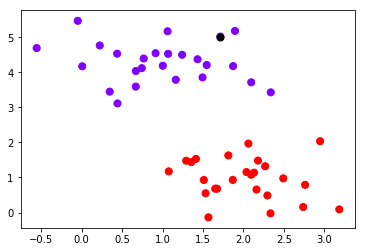

In [35]:
#记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#让我们用一个点来试试看
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")

In [36]:
clf.decision_function(X[10].reshape(1,2))

array([-3.33917354])

In [37]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-3.33917354]
           ,alpha=0.5
           ,linestyles=["--"])

SyntaxError: invalid character in identifier (<ipython-input-37-e8b18d5ac732>, line 4)

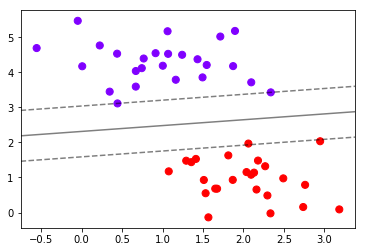

In [46]:
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) #则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [47]:
clf.predict(X)
# 根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [48]:
clf.score(X,y) 
#返回给定测试数据和标签的平均准确度

1.0

In [49]:
clf.support_vectors_
#返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [50]:
clf.n_support_
#返回每个类中支持向量的个数

array([2, 1])

In [51]:
# 非线性情况

In [52]:
from sklearn.datasets import make_circles

In [53]:
X,y = make_circles(100, factor=0.1, noise=.1) 

In [54]:
X.shape

(100, 2)

In [55]:
y.shape

(100,)

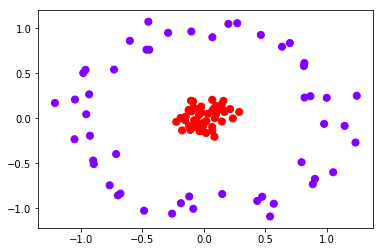

In [56]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

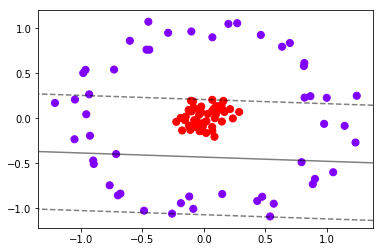

In [57]:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [58]:
clf.score(X,y)

0.69

In [59]:
#定义一个由x计算出来的新维度r 
r = np.exp(-(X**2).sum(1))

In [62]:
rlim = np.linspace(min(r),max(r),100)

In [63]:
r.shape

(100,)

In [64]:
rlim.shape

(100,)

In [65]:
from mpl_toolkits import mplot3d

In [66]:
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim) # 表示调整上下左右旋转的角度
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

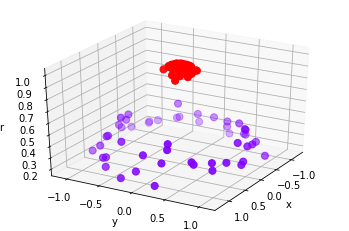

In [69]:
plot_3D()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


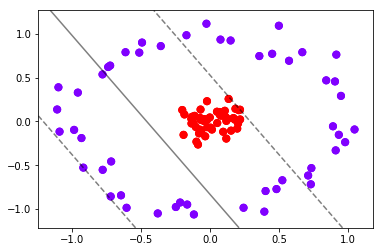

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

In [5]:
#如果放到jupyter notebook中运行
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)

from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

核函数：用低纬计算来表示高维计算结果，满足美式定律，确保了高维空间中任意点积可以被低维空间中的向量的某种计算
来表示，（多数时候是点积的某种变换）。使用核函数计算低维中的向量关系比原本的映射函数要简单太多。计算在原始空间进行，避免了维度诅咒的问题。

linear:线性核，解决线性问题   
poly：多项式核，偏线性   
sigmoid：双曲正切核，非线性   
rbf：高斯径向基，偏非线性   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


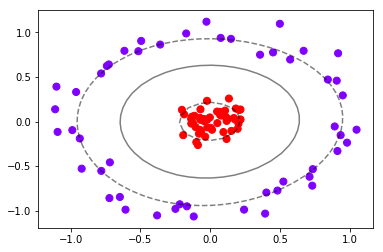

In [6]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

 探索核函数在不同数据集上的表现

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
# from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification
# 画圆的、画月亮形的、画簇的、画对半分的

创建数据集，定义核函数的选择

In [16]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples,noise=0.2,random_state=0),
    make_circles(n_samples=n_samples,noise=0.2,factor=0.5,random_state=1),
    make_blobs(n_samples=n_samples,centers=2,random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0,random_state=5)
]
# 内圆和外圆之间的比例因子
# 两个特征，带信息的是2，不带信息的是0

In [20]:
Kernel = ["linear","poly","rbf","sigmoid"] #四个数据集分别是什么样子呢？

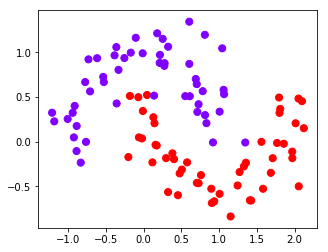

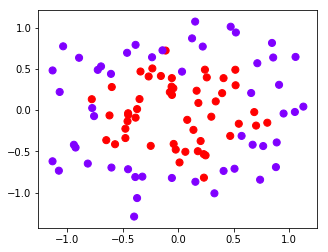

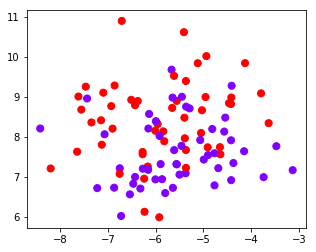

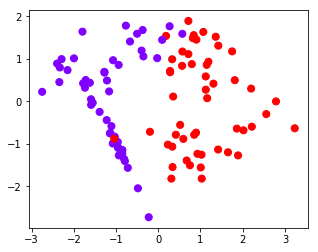

In [18]:
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

构建子图

In [19]:
nrows=len(datasets)
ncols=len(Kernel) + 1

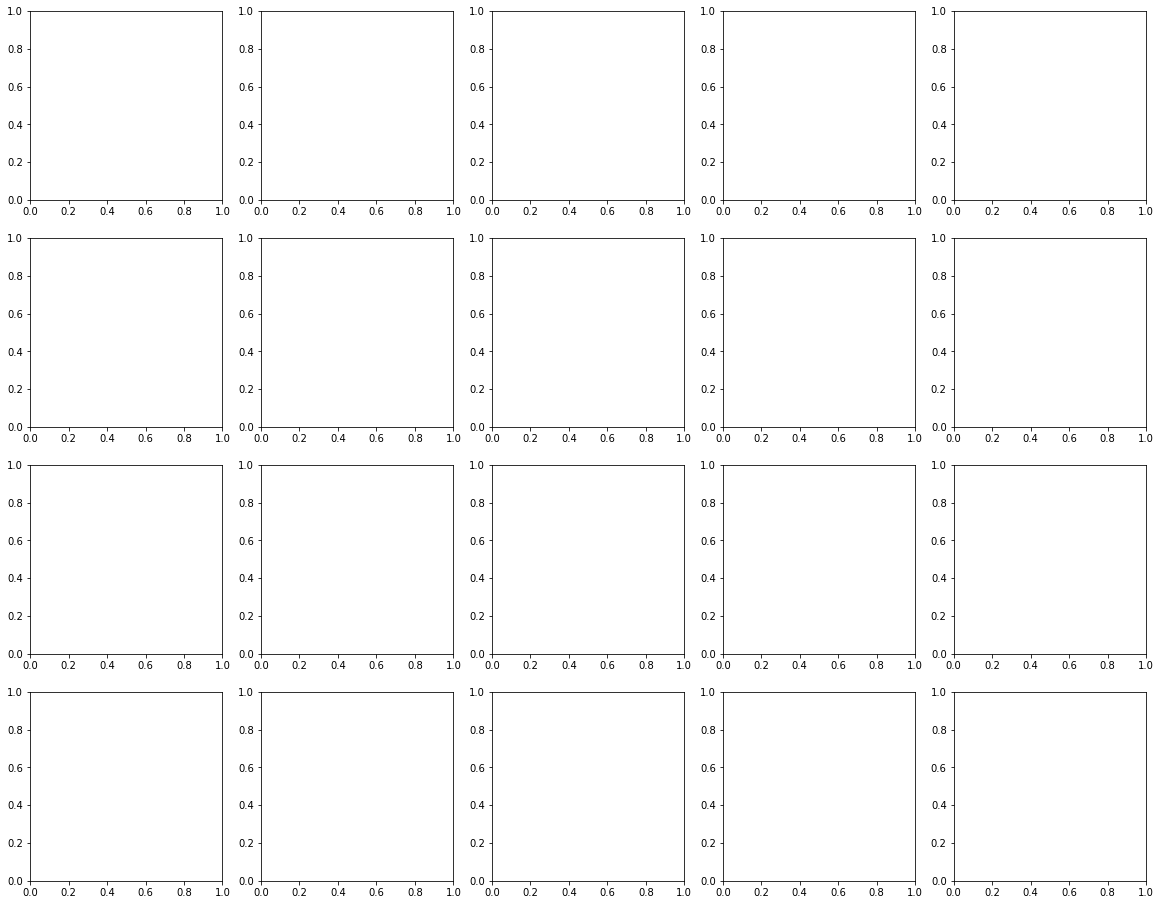

In [20]:
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

开始子图的循环

In [24]:
# [*enumerate(datasets)] # 惰性对象，*+【】打开  # enumerate  map  zip
# 也可以list（）来打开
list(enumerate(datasets)) == [*enumerate(datasets)]

# index,(X,Y) = [(索引，array（[特征矩阵X],[标签Y]）)]

True

In [29]:
[*enumerate(Kernel)]

[(0, 'linear'), (1, 'poly'), (2, 'rbf'), (3, 'sigmoid')]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


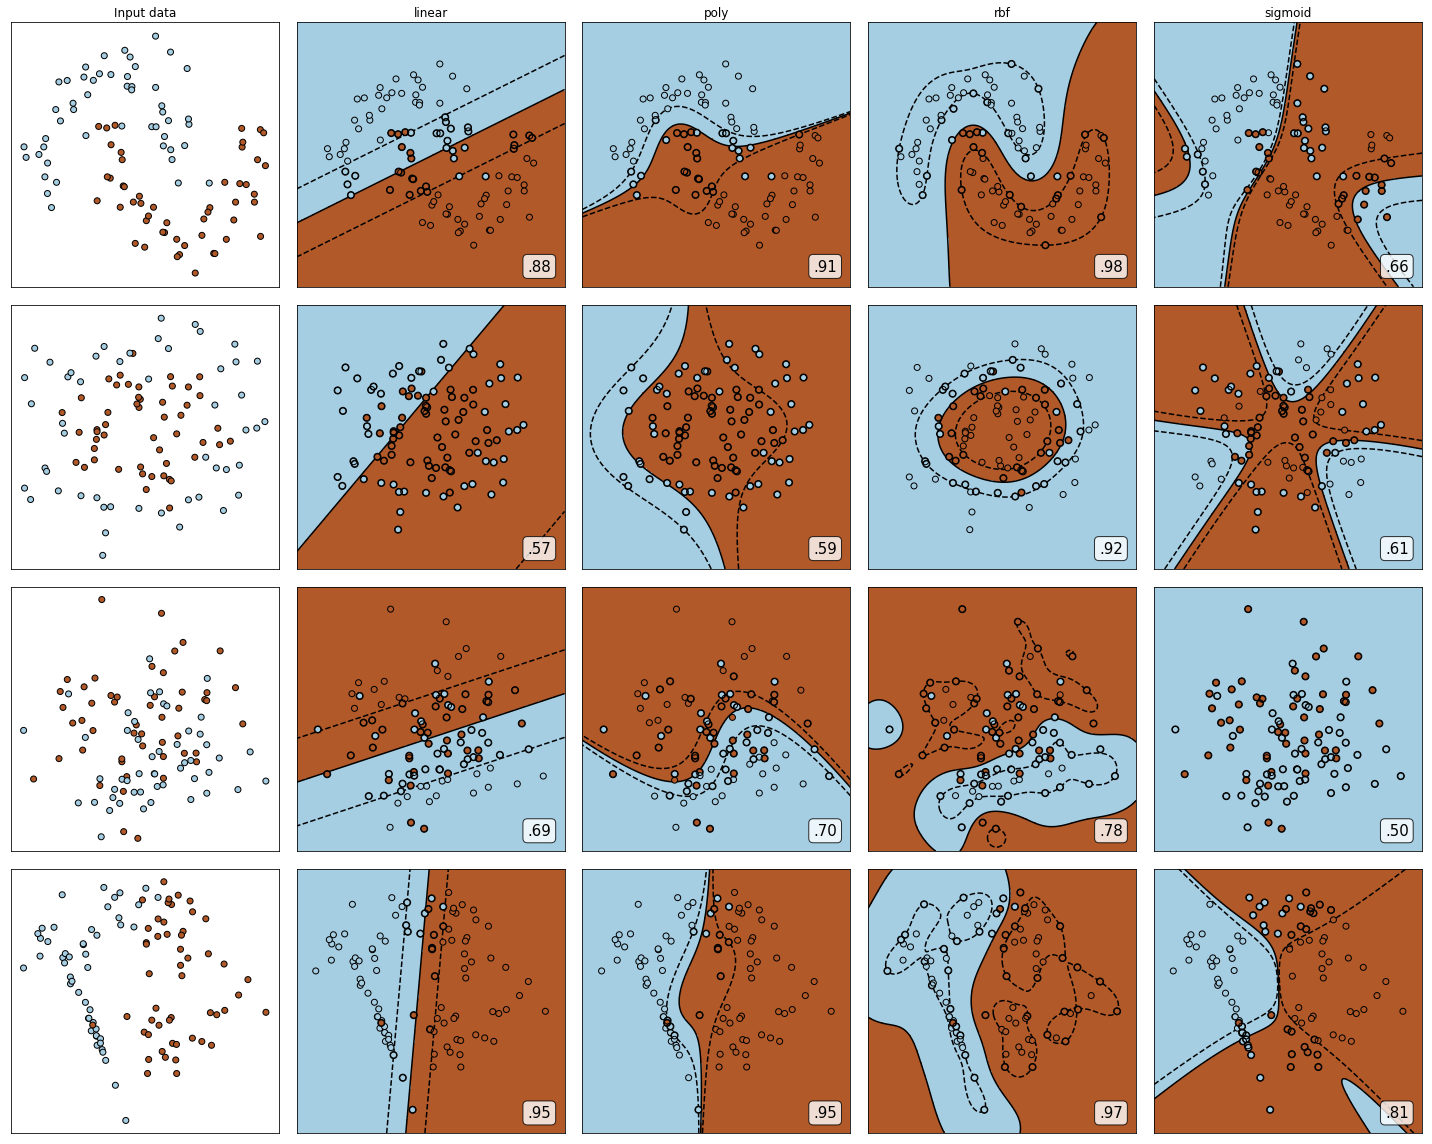

In [37]:
nrows=len(datasets)
ncols=len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt,(X,Y) in enumerate(datasets):
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt,0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:,0],X[:,1], c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())

    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):

        #定义子图位置
        ax = axes[ds_cnt,est_idx + 1]

        #建模
        clf = svm.SVC(kernel=kernel,gamma=2).fit(X,Y)
        score = clf.score(X,Y)

        #绘制图像本身分布的散点图
        ax.scatter(X[:,0], X[:,1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')

        #绘制决策边界
        x_min, x_max = X[:,0].min() - .5,X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5,X[:,1].max() + .5

        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesZh(XX,YY,Z > 0,cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k','k','k'], linestyles=['--','-','--'],
                    levels=[-1, 0, 1])

        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())

        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)

        #为每张图添加分类的分数   
        ax.text(0.95, 0.06, ('%.2f'%score).lstrip('0')  # 分数，不要显示0，显示点后面的数。
                   , size=15
                   , bbox=dict(boxstyle='round',alpha=0.8,facecolor='white')
                   #为分数添加一个白色的格子作为底色
                   , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                   , horizontalalignment='right' #位于坐标轴的什么方向
               )
plt.tight_layout()  # 图像之间的间隔紧缩
plt.show()

探索核函数的优势和缺陷

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [3]:
data = load_breast_cancer()

In [4]:
X = data.data
y = data.target

In [4]:
X.shape

(569, 30)

In [5]:
np.unique(y)

array([0, 1])

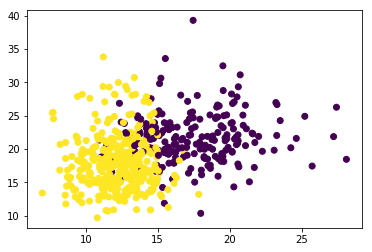

In [43]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
# 用PCA试一下
from sklearn.decomposition import PCA

X_dr = PCA(2).fit_transform(X)
X_dr.shape

(569, 2)

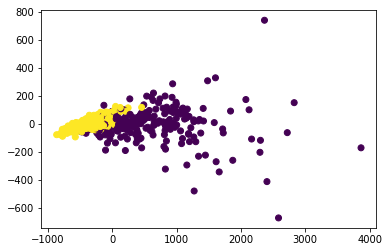

In [45]:
plt.scatter(X_dr[:,0],X_dr[:,1],c=y)
plt.show()

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [7]:
Kernel = ["linear","poly","rbf","sigmoid"]

In [ ]:
for kernel in Kernel:
    time0 = time()  # 记下循环运行开始的时间
    clf= SVC(kernel = kernel
             , gamma="auto"
            # , degree = 1   poly多项式核函数的次数，为1--线性，不为1非线性，默认为3
             , cache_size=5000  # 允许使用多大的内存来运行  #MB    用的内存越高，速度越快，默认200
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))  # 循环用完的时间，减去开始运行的时间。

In [16]:
# now = time()

In [17]:
# datetime.datetime.fromtimestamp(now).strftime("%Y-%m-%d,%H:%M:%S:%f")

In [27]:
Kernel = ["linear","rbf","sigmoid"]
from time import time
for kernel in Kernel:e
    time0 = time()
    clf= SVC(kernel = kernel
             ,gamma="auto"
            # , degree = 1
             ,cache_size=1000).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f"%(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:868612
The accuracy under kernel rbf is 0.596491
00:00:072178
The accuracy under kernel sigmoid is 0.596491
00:00:016011


可以看出，是线性数据集，线性核运行速度比非线性慢很多。

In [28]:
# 多项式核函数在degree=1是可以用线性来用。用起来又快分数又高。

Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:824588
The accuracy under kernel poly is 0.923977
00:00:132157
The accuracy under kernel rbf is 0.596491
00:00:067934
The accuracy under kernel sigmoid is 0.596491
00:00:012008


In [9]:
import pandas as pd

In [10]:
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T\

# 由下面可见，量纲不统一。其实，这里真正的问题是数据的量纲问题。回忆一下我们如何求解决策边界，如何判断点是否在决策边界的一边？
# 是靠计算”距离“，虽然我们不能说SVM是完全的距离类模型，但是它严重受到数据量纲的影响。
# 偏态问题
# 标准化

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.356034e-17,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-7.960826e-17,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-3.824318e-17,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-2.341419e-18,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,-4.526744e-17,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,1.209733e-17,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-5.463312e-18,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,5.931596e-17,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,1.580458e-16,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-7.999850e-18,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [12]:
# 然后看在核函数上的表现
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","poly","rbf","sigmoid"]

In [13]:
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=2000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:069046
The accuracy under kernel poly is 0.964912
00:00:004993
The accuracy under kernel rbf is 0.970760
00:00:005002
The accuracy under kernel sigmoid is 0.953216
00:00:031142


In [37]:
# 量纲统一之后，可以观察到，所有核函数的运算时间都大大地减少了，尤其是对于线性核来说，而多项式核函数居
# 然变成了计算最快的。其次，rbf表现出了非常优秀的结果。经过我们的探索，我们可以得到的结论是：
# 1. 线性核，尤其是多项式核函数在高次项时计算非常缓慢
# 2. rbf和多项式核函数都不擅长处理量纲不统一的数据集

# SVM执行前，非常推荐先进的数据的无量纲化！

核函数相关参数：degree&gamma&coef0

In [14]:
# 用学习曲线对高斯径向基的gamma进行探索
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字

In [15]:
gamma_range

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

In [17]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

# 故可以通过调参把rbf调成和线性核准确率一样的

SyntaxError: invalid character in identifier (<ipython-input-17-4ad0f1eaf6cd>, line 5)

In [18]:
# 再试试多项式核函数（网格搜索）
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV  # 带交叉验证的网格搜索功能

time0 = time()

gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)

param_grid = dict(gamma = gamma_range,coef0 = coef0_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000)
                    ，param_grid=param_grid
                    ,cv=cv)
grid.fit(X, y)  # 拟合，拟合完毕后就得到了最佳的参数

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
00:11:635463


软间隔支持向量机（寻找最大边界与被分错的样本之间的平衡）

以看得出，这其实是将原本的虚线超平面向图像的上方和下方平移，两条直线在纵坐标上的差异就是科赛，其实科赛并不是点到超平面的距离本身，   
而是变化一直而已。

C是用来控制惩罚项的惩罚力度的系数，来控制最大边界与被分错的样本之间的平衡的。

参数C用于权衡”训练样本的正确分类“与”决策函数的边际最大化“两个不可同时完成的目标，希望找出一个平衡点来
让模型的效果最佳。

C浮点数，默认1，可不填。如果C设置的比较大，那边界就比较小，能够更好的分类所有训练点的决策边界，耗时较长。C设置的较小，那SVC会尽量   
最大化边界，决策功能会更简单，但代价是训练的准确度会降低。换句话说，C在SVM中的影响就像正则化参数对逻辑回归的影响。

0.9766081871345029 1.2340816326530613


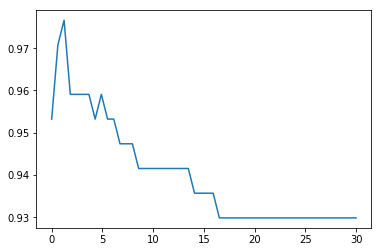

In [20]:
#调线性核函数
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [24]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))  

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-24-d30b7fdf65d6>, line 6)

0.9824561403508771 5.938775510204081


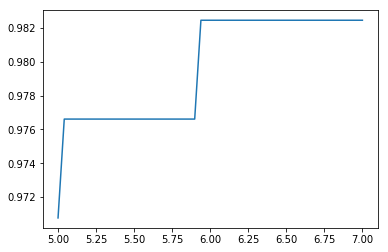

In [27]:
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()